In [92]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

sns.set(style="whitegrid", context="talk")


In [93]:

data_path = "C://Users//aditi//OneDrive//Desktop//fraud_detection//fraud_data - Sheet 1.csv"
df = pd.read_csv(data_path)

df.head()


,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.1700,47605,Houston,Travel,18.0000,0
1,2,950.7600,38088,Los Angeles,Electronics,28.0000,0
2,3,732.2600,78752,Miami,Travel,20.0000,0
3,4,599.0600,55284,New York,Groceries,69.0000,0
4,5,156.8600,57043,New York,Groceries,79.0000,0


In [94]:
df.shape

(500, 7)

In [95]:
df.dtypes

TransactionID         int64
Amount              float64
Time                  int64
Location             object
MerchantCategory     object
CardHolderAge       float64
IsFraud               int64
dtype: object

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     500 non-null    int64  
 1   Amount            475 non-null    float64
 2   Time              500 non-null    int64  
 3   Location          475 non-null    object 
 4   MerchantCategory  500 non-null    object 
 5   CardHolderAge     476 non-null    float64
 6   IsFraud           500 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 27.5+ KB


In [97]:
df.columns


Index(['TransactionID', 'Amount', 'Time', 'Location', 'MerchantCategory',
       'CardHolderAge', 'IsFraud'],
      dtype='object')

In [98]:

missing_df = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_percentage": df.isna().mean() * 100
}).sort_values("missing_percentage", ascending=False)

missing_df


,missing_count,missing_percentage
Amount,25,5.0000
Location,25,5.0000
CardHolderAge,24,4.8000
TransactionID,0,0.0000
Time,0,0.0000
MerchantCategory,0,0.0000
IsFraud,0,0.0000


In [99]:

duplicate_count = df.duplicated().sum()
duplicate_percentage = duplicate_count / len(df) * 100

duplicate_count, duplicate_percentage


(0, 0.0)

In [100]:

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_cols, categorical_cols


(['TransactionID', 'Amount', 'Time', 'CardHolderAge', 'IsFraud'],
 ['Location', 'MerchantCategory'])

In [101]:

outlier_summary = {}
for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outlier_summary[col] = ((df[col] < lower) | (df[col] > upper)).sum()

pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["iqr_outlier_count"])


,iqr_outlier_count
TransactionID,0
Amount,10
Time,0
CardHolderAge,2
IsFraud,27


In [102]:

zscore_outliers = {}
for col in numeric_cols:
    z = np.abs(stats.zscore(df[col].dropna()))
    zscore_outliers[col] = (z > 3).sum()

pd.DataFrame.from_dict(zscore_outliers, orient="index", columns=["zscore_outlier_count"])


,zscore_outlier_count
TransactionID,0
Amount,10
Time,0
CardHolderAge,2
IsFraud,27


In [103]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,500.0000,250.5000,144.4818,1.0000,125.7500,250.5000,375.2500,500.0000
Amount,475.0000,641.1128,"1,044.4481",6.0600,243.7800,518.8100,776.0000,"9,691.5786"
Time,500.0000,"41,141.4820","25,614.4690",55.0000,"18,726.2500","40,772.0000","63,463.2500","86,066.0000"
CardHolderAge,476.0000,47.5189,18.6774,5.0000,32.0000,47.0000,63.0000,120.0000
IsFraud,500.0000,0.0540,0.2262,0.0000,0.0000,0.0000,0.0000,1.0000


In [104]:
fraud_counts = df['IsFraud'].value_counts()
fraud_counts


IsFraud
0    473
1     27
Name: count, dtype: int64

In [105]:
fraud = fraud_counts.get(1, 0)
legit = fraud_counts.get(0, 0)

legit / fraud, fraud / len(df) * 100, legit / len(df) * 100


(17.51851851851852, 5.4, 94.6)

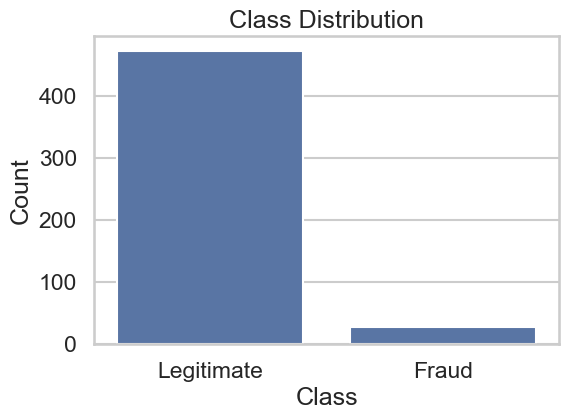

In [106]:
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks([0, 1], ["Legitimate", "Fraud"])
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

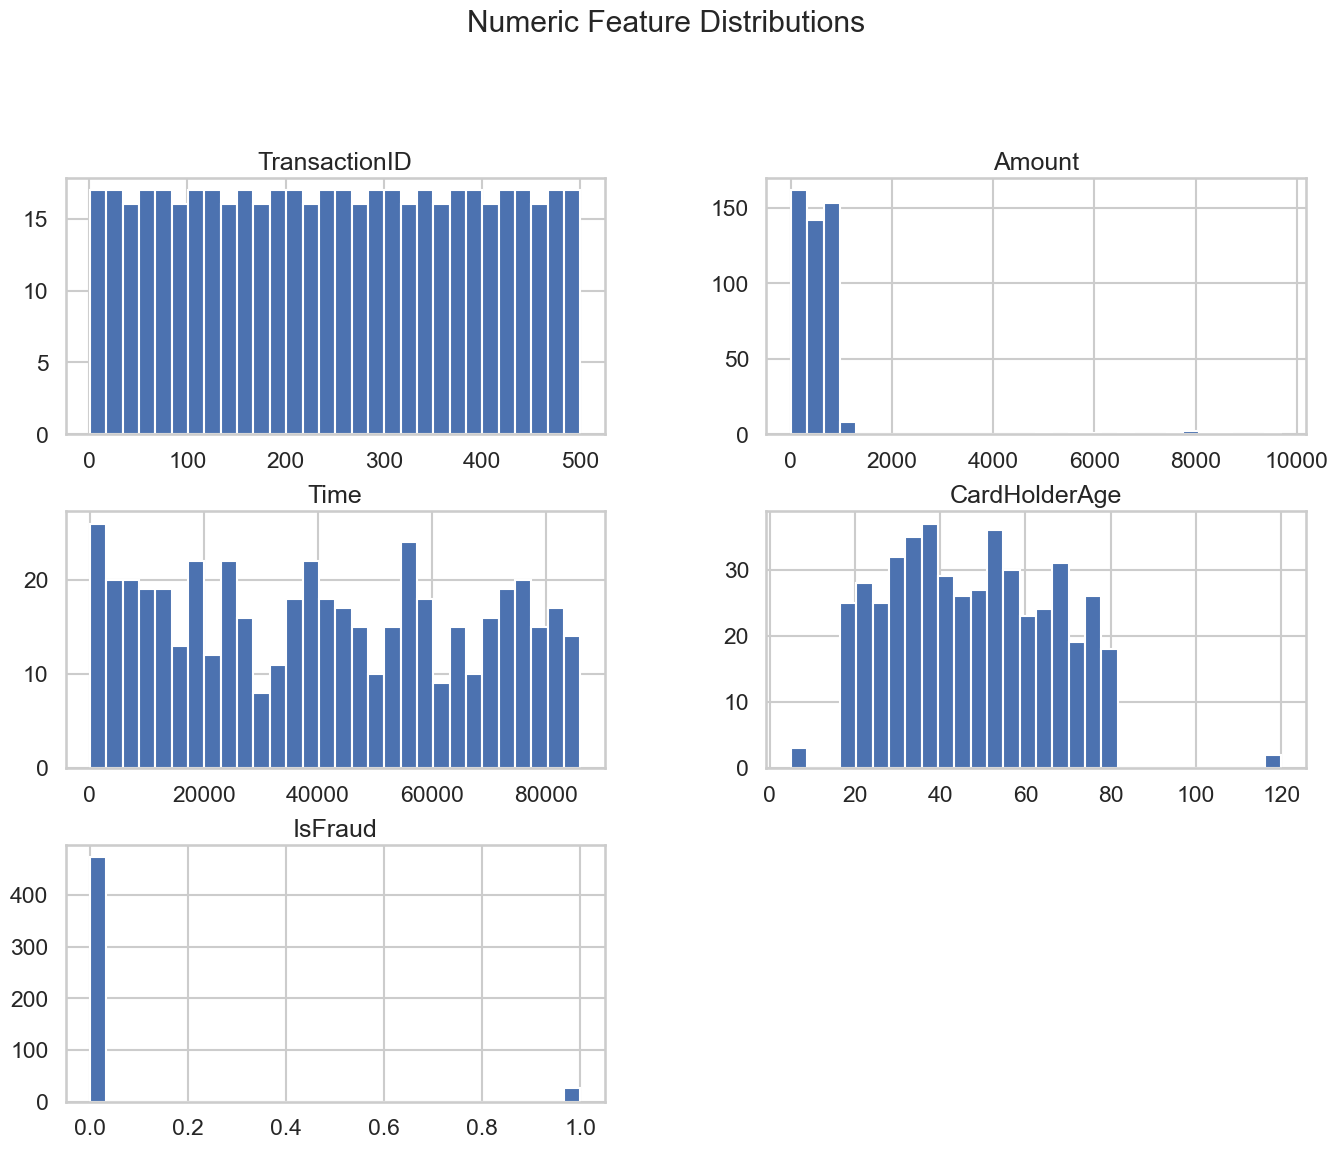

In [107]:

df[numeric_cols].hist(figsize=(16,12), bins=30)
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()


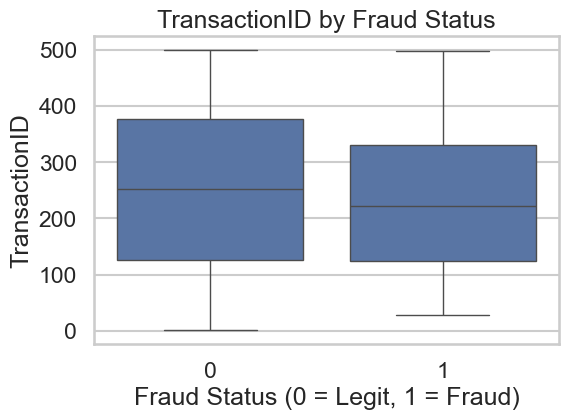

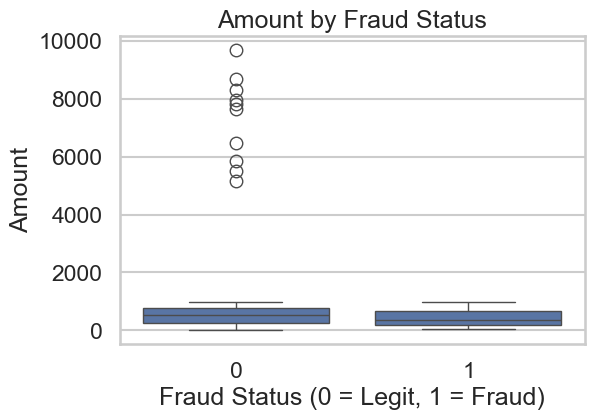

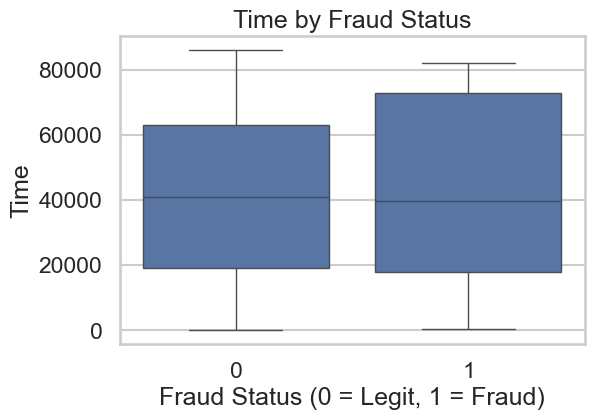

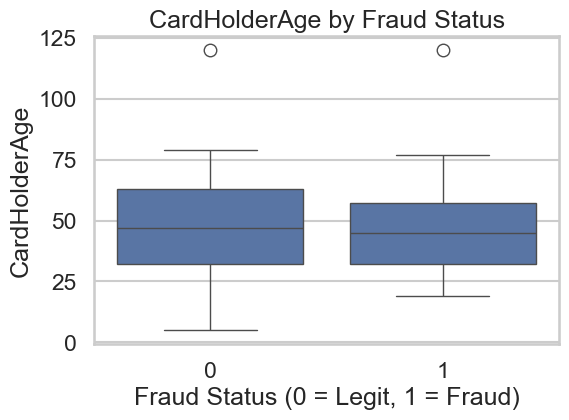

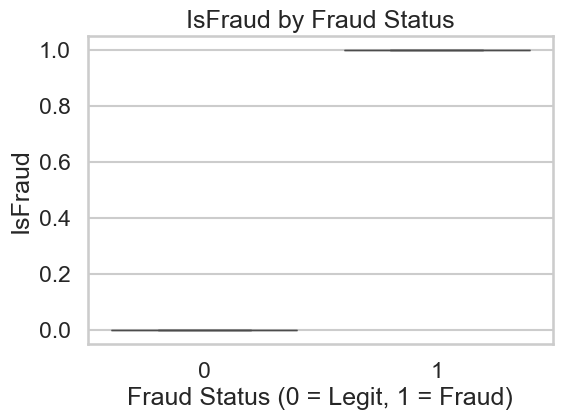

In [108]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="IsFraud", y=col, data=df)
    plt.title(f"{col} by Fraud Status")
    plt.xlabel("Fraud Status (0 = Legit, 1 = Fraud)")
    plt.show()


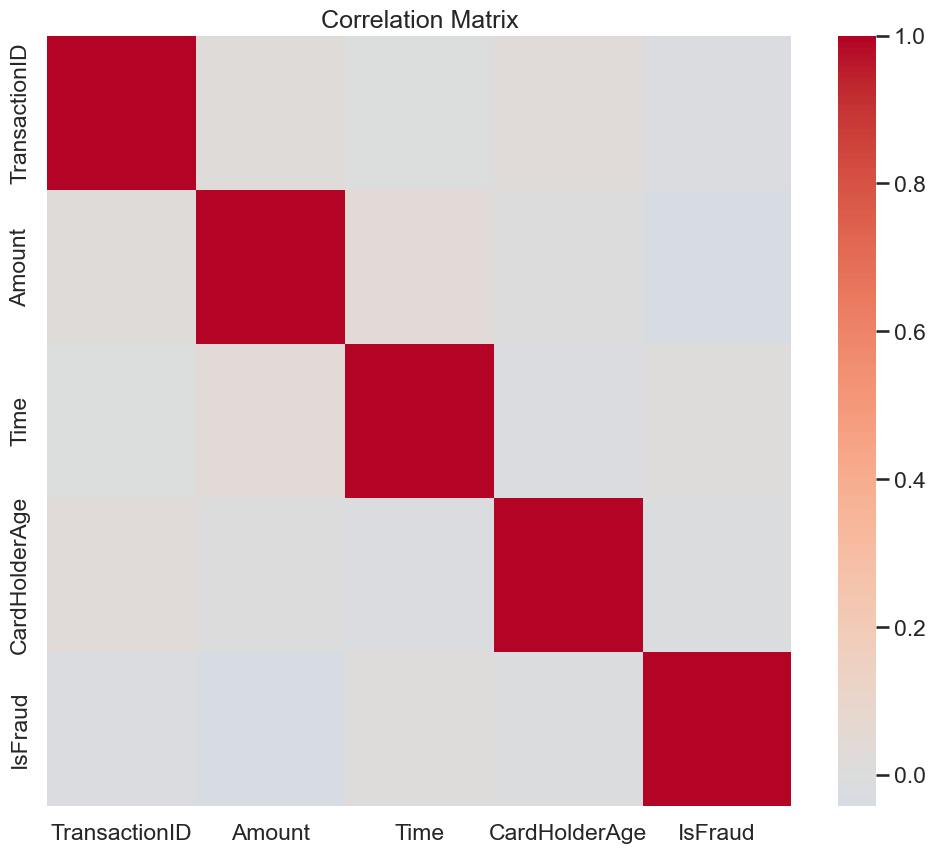

In [109]:

corr = df[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()


In [110]:
missing_cols = missing_df[missing_df["missing_count"] > 0].index.tolist()
missing_indicators = df[missing_cols].isna().astype(int)
missing_indicators["IsFraud"] = df["IsFraud"]
missing_indicators.groupby("IsFraud").mean()


,Amount,Location,CardHolderAge
IsFraud,,,
0,0.0486,0.0507,0.0465
1,0.0741,0.0370,0.0741


In [111]:
ks_results = []

for col in numeric_cols:
    fraud_vals = df[df["IsFraud"] == 1][col].dropna()
    legit_vals = df[df["IsFraud"] == 0][col].dropna()

    ks_stat, p_val = stats.ks_2samp(fraud_vals, legit_vals)

    ks_results.append({
        "feature": col,
        "ks_statistic": ks_stat,
        "p_value": p_val
    })

ks_df = pd.DataFrame(ks_results).sort_values("ks_statistic", ascending=False)
ks_df

,feature,ks_statistic,p_value
4,IsFraud,1.0000,0.0000
2,Time,0.1642,0.4477
1,Amount,0.1444,0.6602
0,TransactionID,0.1351,0.6866
3,CardHolderAge,0.1235,0.8173


In [112]:

df[categorical_cols].nunique().sort_values(ascending=False).to_frame("unique_values")


,unique_values
Location,5
MerchantCategory,5


In [113]:
target_corr = (
    df[numeric_cols]
    .corrwith(df["IsFraud"])
    .abs()
    .sort_values(ascending=False)
)

target_corr.to_frame("abs_corr_with_target")


,abs_corr_with_target
IsFraud,1.0000
Amount,0.0420
TransactionID,0.0196
Time,0.0142
CardHolderAge,0.0081
